In [1]:
# Dependancies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy import stats

print('done!')

done!


In [2]:
S_media = pd.read_csv('clean_data.csv')
S_media.head()

,Age,Gender,Occupation,Use Social Media (Y/N),Soical Media Platforms Used,Average time on social media (per Day),How often do you find yourself using Social media without a specific purpose?,How often do you get distracted by Social media when you are busy doing something?,Do you feel restless if you haven't used Social media in a while?,"On a scale of 1 to 5, how easily distracted are you?","On a scale of 1 to 5, how much are you bothered by worries?",Do you find it difficult to concentrate on things?,"On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","Following the previous question, how do you feel about these comparisons, generally speaking?",How often do you look to seek validation from features of social media?,How often do you feel depressed or down?,"On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [3]:
S_media.describe()

,Age,How often do you find yourself using Social media without a specific purpose?,How often do you get distracted by Social media when you are busy doing something?,Do you feel restless if you haven't used Social media in a while?,"On a scale of 1 to 5, how easily distracted are you?","On a scale of 1 to 5, how much are you bothered by worries?",Do you find it difficult to concentrate on things?,"On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","Following the previous question, how do you feel about these comparisons, generally speaking?",How often do you look to seek validation from features of social media?,How often do you feel depressed or down?,"On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","On a scale of 1 to 5, how often do you face issues regarding sleep?"
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,25.921729,3.547672,3.328160,2.605322,3.354767,3.560976,3.237251,2.838137,2.767184,2.443459,3.252772,3.144124,3.199557
std,9.552164,1.091100,1.319455,1.239845,1.161644,1.272856,1.336342,1.407270,1.041958,1.237657,1.315872,1.246891,1.454525
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Key points
1. The mean for all main focus cloumns is not the same
2. The BOTTOM quater of the dificulty concentrrating is between 2 and 3, depending on question
3. Half the data comes from people between 21 and 26, with a quater younger than that
# Should I treat that as 2 data sets, with one much smaller?
4. The 50% for issues with concentration is around 3 or 4 for all questions
5. at 75% all are at 4 for my target cloumns

# Social Media On Concentration by Hours Used

In [4]:
# focsing the data set
data= S_media[['Age', 'Average time on social media (per Day)', 'How often do you find yourself using Social media without a specific purpose?', 'How often do you get distracted by Social media when you are busy doing something?', 'On a scale of 1 to 5, how easily distracted are you?', 'Do you find it difficult to concentrate on things?']]
data.head()

,Age,Average time on social media (per Day),How often do you find yourself using Social media without a specific purpose?,How often do you get distracted by Social media when you are busy doing something?,"On a scale of 1 to 5, how easily distracted are you?",Do you find it difficult to concentrate on things?
0,21.0,Between 2 and 3 hours,5,3,5,5
1,21.0,More than 5 hours,4,3,4,4
2,21.0,Between 3 and 4 hours,3,2,2,4
3,21.0,More than 5 hours,4,2,3,3
4,21.0,Between 2 and 3 hours,3,5,4,5


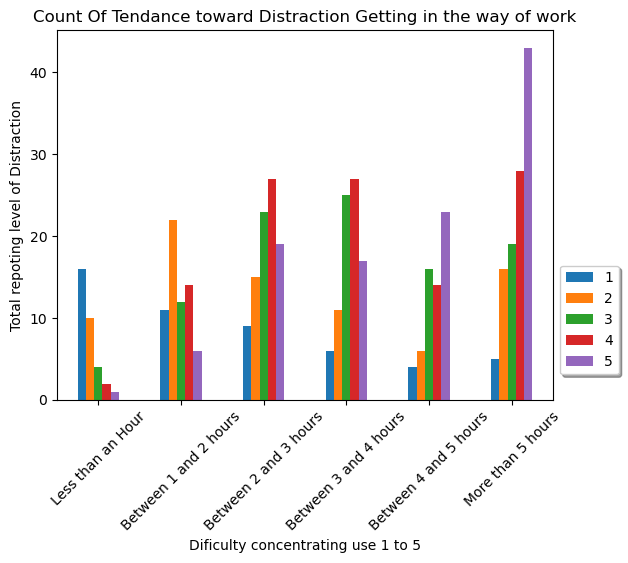

In [5]:
# Generate a bar plot showing The reported distraction by hours of social media

Pan_Bar = data.groupby(['Average time on social media (per Day)',
                'How often do you get distracted by Social media when you are busy doing something?']).size().unstack()
Pan_bar = Pan_Bar.reindex(['Less than an Hour', 'Between 1 and 2 hours','Between 2 and 3 hours',
       'Between 3 and 4 hours', 'Between 4 and 5 hours',
       'More than 5 hours'])
Pan_bar.plot.bar()

plt.title('Count Of Tendance toward Distraction Getting in the way of work')
plt.xlabel('Dificulty concentrating use 1 to 5')
plt.ylabel('Total repoting level of Distraction')
plt.xticks(rotation=45)
##place key out of frame, to better see bars
plt.legend(Pan_Bar, loc='lower left', bbox_to_anchor=(1, 0.05),
          ncol=1, fancybox=True, shadow=True)

plt.show()

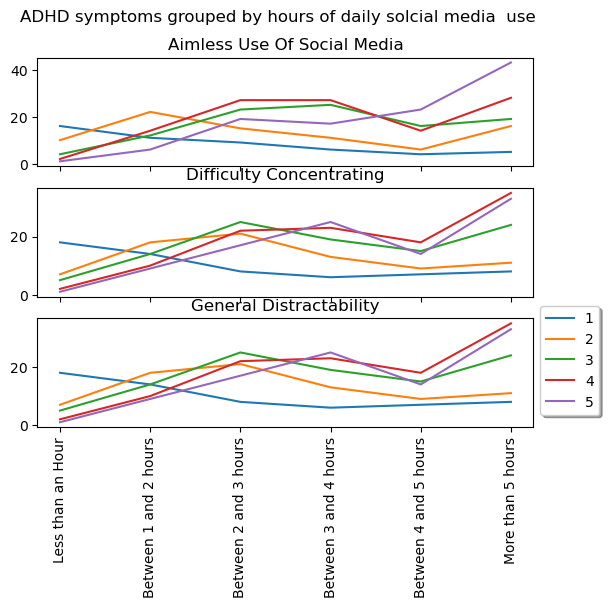

In [6]:
fig, axs = plt.subplots(3)
fig.suptitle('ADHD symptoms grouped by hours of daily solcial media  use')
Pan_Bar1 = data.groupby(['Average time on social media (per Day)',
    'How often do you find yourself using Social media without a specific purpose?']).size().unstack()

Pan_Bar2 = data.groupby(['Average time on social media (per Day)',
                         'Do you find it difficult to concentrate on things?']).size().unstack()
Pan_Bar3 = data.groupby(['Average time on social media (per Day)',
                         'On a scale of 1 to 5, how easily distracted are you?']).size().unstack()

Pan_Bar1 =Pan_Bar.reindex(['Less than an Hour', 'Between 1 and 2 hours','Between 2 and 3 hours',
       'Between 3 and 4 hours', 'Between 4 and 5 hours',
       'More than 5 hours'])
Pan_Bar2 = Pan_Bar2.reindex(['Less than an Hour', 'Between 1 and 2 hours','Between 2 and 3 hours',
       'Between 3 and 4 hours', 'Between 4 and 5 hours',
    'More than 5 hours'])
Pan_Bar3 = Pan_Bar2.reindex(['Less than an Hour', 'Between 1 and 2 hours','Between 2 and 3 hours',
       'Between 3 and 4 hours', 'Between 4 and 5 hours',
    'More than 5 hours'])
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

axs[0].plot(Pan_Bar1)
axs[0].set_title('Aimless Use Of Social Media')

axs[1].plot(Pan_Bar2)
axs[1].set_title('Difficulty Concentrating')
axs[2].plot(Pan_Bar3)
axs[2].set_title('General Distractability')
axs[2].tick_params(axis='x', rotation=90)
plt.legend(Pan_Bar1, loc='lower left', bbox_to_anchor=(1, 0.05),
          ncol=1, fancybox=True, shadow=True)

for ax in fig.get_axes():
    ax.label_outer()
    
plt.show()

# And now for something stupid

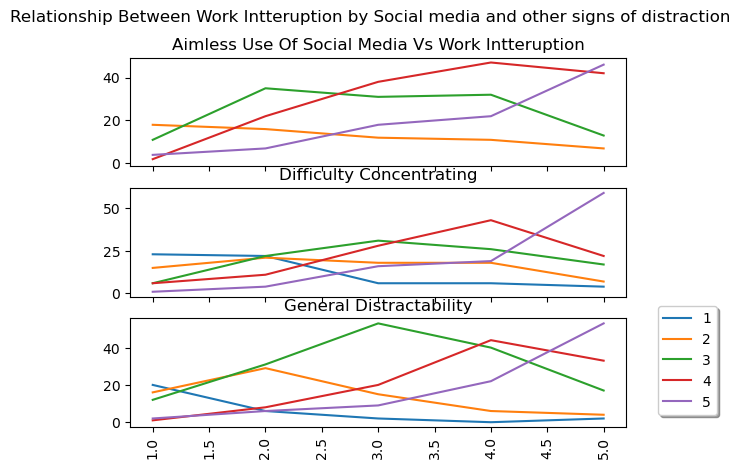

In [7]:
fig, axs = plt.subplots(3)
fig.suptitle('Relationship Between Work Intteruption by Social media and other signs of distraction')
Pan_Bar1 = data.groupby(['How often do you get distracted by Social media when you are busy doing something?',
                         'How often do you find yourself using Social media without a specific purpose?']).size().unstack()

Pan_Bar2 = data.groupby(['How often do you get distracted by Social media when you are busy doing something?',
                         'Do you find it difficult to concentrate on things?']).size().unstack()

Pan_Bar3 = data.groupby(['How often do you get distracted by Social media when you are busy doing something?',
                         'On a scale of 1 to 5, how easily distracted are you?']).size().unstack().fillna(0)

#Pan_Bar1 =Pan_Bar1.reindex(['Less than an Hour', 'Between 1 and 2 hours','Between 2 and 3 hours',
 #      'Between 3 and 4 hours', 'Between 4 and 5 hours', 'More than 5 hours'])

#Pan_Bar2 = Pan_Bar2.reindex(['Less than an Hour', 'Between 1 and 2 hours','Between 2 and 3 hours',
 #      'Between 3 and 4 hours', 'Between 4 and 5 hours', 'More than 5 hours'])

#Pan_Bar3 = Pan_Bar3.reindex(['Less than an Hour', 'Between 1 and 2 hours','Between 2 and 3 hours',
 #      'Between 3 and 4 hours', 'Between 4 and 5 hours', 'More than 5 hours'])
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

axs[0].plot(Pan_Bar1)
axs[0].set_title('Aimless Use Of Social Media Vs Work Intteruption')

axs[1].plot(Pan_Bar2)
axs[1].set_title('Difficulty Concentrating')

axs[2].plot(Pan_Bar3)
axs[2].set_title('General Distractability')
axs[2].tick_params(axis='x', rotation=90)

plt.legend(Pan_Bar1, loc='lower left', bbox_to_anchor=(1.05, 0.05),
          ncol=1, fancybox=True, shadow=True)

for ax in fig.get_axes():
    ax.label_outer()
    
plt.show()

In [8]:
data.groupby(['How often do you get distracted by Social media when you are busy doing something?',
                         'Do you find it difficult to concentrate on things?']).size().unstack()

Do you find it difficult to concentrate on things?,1,2,3,4,5
How often do you get distracted by Social media when you are busy doing something?,,,,,
1,23,15,6,6,1
2,22,21,22,11,4
3,6,18,31,28,16
4,6,18,26,43,19
5,4,7,17,22,59


In [9]:
 data.groupby(['How often do you get distracted by Social media when you are busy doing something?',
                         'On a scale of 1 to 5, how easily distracted are you?']).size().unstack().fillna(0)

"On a scale of 1 to 5, how easily distracted are you?",1,2,3,4,5
How often do you get distracted by Social media when you are busy doing something?,,,,,
1,20.0,16.0,12.0,1.0,2.0
2,6.0,29.0,31.0,8.0,6.0
3,2.0,15.0,53.0,20.0,9.0
4,0.0,6.0,40.0,44.0,22.0
5,2.0,4.0,17.0,33.0,53.0


# Multi Bar

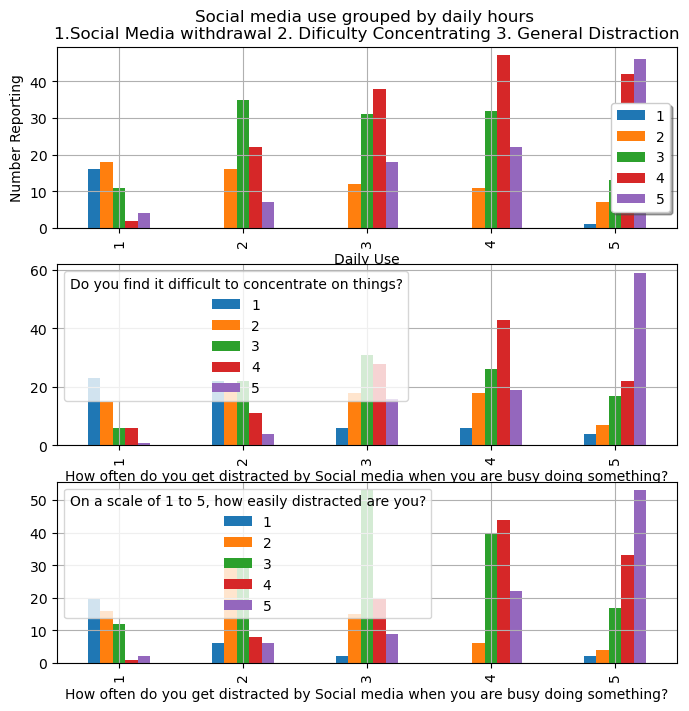

In [10]:
fig, axes = plt.subplots(figsize=(8,8),nrows=3, ncols=1)
ax1=plt.subplot(3,1,1)
Pan_Bar1.plot(ax=axes[0], kind='bar', grid=True)
plt.legend(Pan_Bar1, loc='lower left', bbox_to_anchor=(1, 0.05),
          ncol=1, fancybox=True, shadow=True)
plt.title('Social media use grouped by daily hours \n1.Social Media withdrawal​ 2. Dificulty Concentrating 3. General Distraction')


Pan_Bar2.plot(ax=axes[1], kind='bar', grid=True)
plt.legend(Pan_Bar2, loc='lower right', bbox_to_anchor=(1, 1.05),
          ncol=1, fancybox=True, shadow=True)


Pan_Bar3.plot(ax=axes[2], kind='bar', grid=True)


plt.legend(Pan_Bar3, loc='lower right', bbox_to_anchor=(1, 0.05),
         ncol=1, fancybox=True, shadow=True)

ax1.grid(True)
ax1.set_ylabel('Number Reporting')
ax1.set_xlabel('Daily Use')

plt.show()

In [13]:
chi4everyone = {}
for (columnName, columnData) in S_media.iteritems():
    
    #print('Column Contents : ', columnData.values)
    # defining the table
    data = [S_media.groupby(['Average time on social media (per Day)',columnName]).size().unstack().fillna(0)]
    stat, p, dof, expected = chi2_contingency(data)
# https://stackoverflow.com/questions/64669448/understanding-scipy-stats-chisquare
# interpret p-value
    print(columnName)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
        chi4everyone.update({columnName : (p, 'Dependent (reject H0)')})
    else:
        print('Independent (H0 holds true)')
        chi4everyone.update({columnName : (p, 'Independent (H0 holds true)')})

Age
p value is 4.5378863154030643e-07
Dependent (reject H0)
Gender
p value is 0.01911556777613085
Dependent (reject H0)
Occupation
p value is 7.829847688016549e-09
Dependent (reject H0)
Use Social Media (Y/N)
p value is 0.05382830073150313
Independent (H0 holds true)
Soical Media Platforms Used
p value is 0.07272445709856375
Independent (H0 holds true)
Average time on social media (per Day)
p value is 0.0
Dependent (reject H0)
How often do you find yourself using Social media without a specific purpose?
p value is 1.9015824818054118e-14
Dependent (reject H0)
How often do you get distracted by Social media when you are busy doing something?
p value is 8.308477261188299e-14
Dependent (reject H0)
Do you feel restless if you haven't used Social media in a while?
p value is 1.507765132983696e-16
Dependent (reject H0)
On a scale of 1 to 5, how easily distracted are you?
p value is 3.817557957163049e-14
Dependent (reject H0)
On a scale of 1 to 5, how much are you bothered by worries?
p value 

C:\Users\Sch\AppData\Local\Temp\ipykernel_332\3854425522.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in S_media.iteritems():


In [16]:
chidf = pd.DataFrame(chi4everyone)
chidf.T

,0,1
Age,0.0,Dependent (reject H0)
Gender,0.019116,Dependent (reject H0)
Occupation,0.0,Dependent (reject H0)
Use Social Media (Y/N),0.053828,Independent (H0 holds true)
Soical Media Platforms Used,0.072724,Independent (H0 holds true)
Average time on social media (per Day),0.0,Dependent (reject H0)
How often do you find yourself using Social media without a specific purpose?,0.0,Dependent (reject H0)
How often do you get distracted by Social media when you are busy doing something?,0.0,Dependent (reject H0)
Do you feel restless if you haven't used Social media in a while?,0.0,Dependent (reject H0)
"On a scale of 1 to 5, how easily distracted are you?",0.0,Dependent (reject H0)
